In [586]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns

logging.basicConfig(level=logging.INFO)

# Load Dataset

In [587]:
from sklearn.datasets.california_housing import fetch_california_housing

housing = fetch_california_housing(download_if_missing=False)

features, labels  = housing['data'], housing['target']
col_names = housing['feature_names']

X = pd.DataFrame(features, columns=col_names).drop(columns=['Latitude','Longitude'])
y = pd.DataFrame(labels, columns=['target'])

In [604]:
X.sample(5).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
6037,1.4063,51.0,4.446429,1.026786,368.0,3.285714
19480,3.5395,24.0,5.140351,1.031579,1448.0,2.540351
7129,4.9107,33.0,6.568966,0.988506,508.0,2.919540
3216,2.3523,52.0,5.172840,1.057613,624.0,2.567901
17983,3.7188,21.0,4.147379,1.056380,2487.0,2.459941


In [605]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [606]:
y.sample(5)

,target
6680,2.37500
8927,4.25000
8396,2.62500
10644,5.00001
18846,0.76100


# Linear Regression

In [607]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [608]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [609]:
from sklearn.preprocessing import StandardScaler

In [610]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)

In [611]:
reg = LinearRegression()
reg.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [612]:
reg.intercept_

array([2.07034892])

In [613]:
print(reg.coef_)

[[ 1.03705131  0.2094345  -0.54450443  0.49574482  0.02692664 -0.05407533]]


In [614]:
col_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [615]:
importances = pd.DataFrame(sorted(list(zip(reg.coef_[0], col_names)), key= lambda x : x[0], reverse=True), 
                           columns=['coefs','col_names'])
importances

,coefs,col_names
0,1.037051,MedInc
1,0.495745,AveBedrms
2,0.209435,HouseAge
3,0.026927,Population
4,-0.054075,AveOccup
5,-0.544504,AveRooms


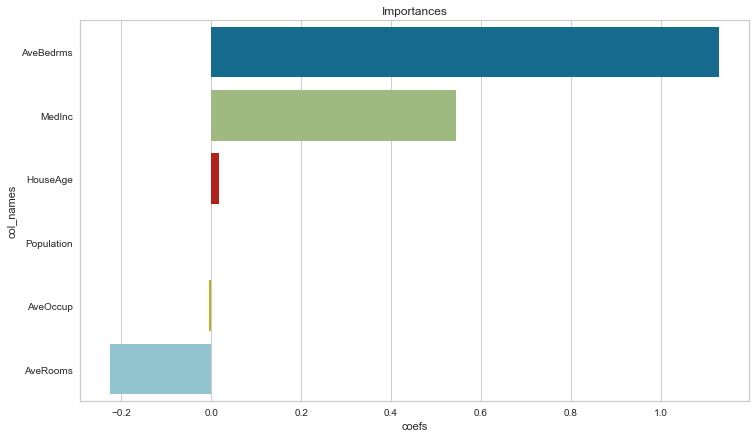

In [600]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
sns.barplot(importances.coefs,importances.col_names, orient='h', ax=ax, )
plt.title('Importances')
plt.show()

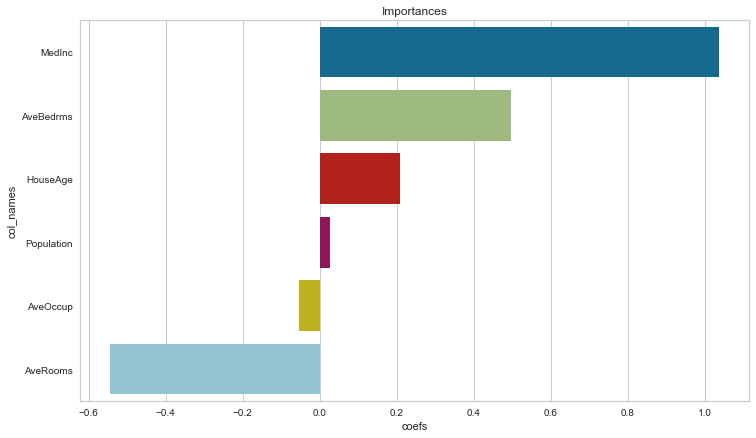

In [616]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
sns.barplot(importances.coefs,importances.col_names, orient='h', ax=ax, )
plt.title('Importances')
plt.show()

# Partial Dependence Plot

In [617]:
from yellowbrick.datasets import load_occupancy

In [618]:
X = load_occupancy()[0]
y = load_occupancy()[1]

**BOOOK** for reference:

https://christophm.github.io/interpretable-ml-book/pdp.html

In [619]:
X.isna().sum()

temperature          0
relative humidity    0
light                0
CO2                  0
humidity             0
dtype: int64

In [620]:
X.head()

,temperature,relative humidity,light,CO2,humidity
0,23.18,27.2720,426.0,721.25,0.004793
1,23.15,27.2675,429.5,714.00,0.004783
2,23.15,27.2450,426.0,713.50,0.004779
3,23.15,27.2000,426.0,708.25,0.004772
4,23.10,27.2000,426.0,704.50,0.004757


In [621]:
y.value_counts()

0    15810
1     4750
Name: occupancy, dtype: int64

https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

Temperature in Celsius.

Relative humidity as a percentage.

Light measured in lux.

Carbon dioxide measured in parts per million.

Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.

Occupancy as either 1 for occupied or 0 for not occupied.

## Logistic Regression

In [622]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [623]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [637]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [638]:
model.fit(scaler.transform(X_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [639]:
importances = pd.DataFrame(zip(model.coef_[0], X_train.columns), columns=['coefs','feature'])
importances

,coefs,feature
0,-1.304952,temperature
1,-0.939478,relative humidity
2,4.794266,light
3,1.073170,CO2
4,1.342761,humidity


In [640]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, model.predict_proba(scaler.transform(X_test))[:, 1])

0.9954274535755724

In [641]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(max_depth=2)

In [642]:
df.corr()

,temperature,relative humidity,light,CO2,humidity,occupancy
temperature,1.000000,-0.152252,0.689293,0.447125,0.210375,0.558837
relative humidity,-0.152252,1.000000,-0.023997,0.304493,0.932574,0.051993
light,0.689293,-0.023997,1.000000,0.447906,0.229159,0.914142
CO2,0.447125,0.304493,0.447906,1.000000,0.481126,0.502735
humidity,0.210375,0.932574,0.229159,0.481126,1.000000,0.264164
occupancy,0.558837,0.051993,0.914142,0.502735,0.264164,1.000000


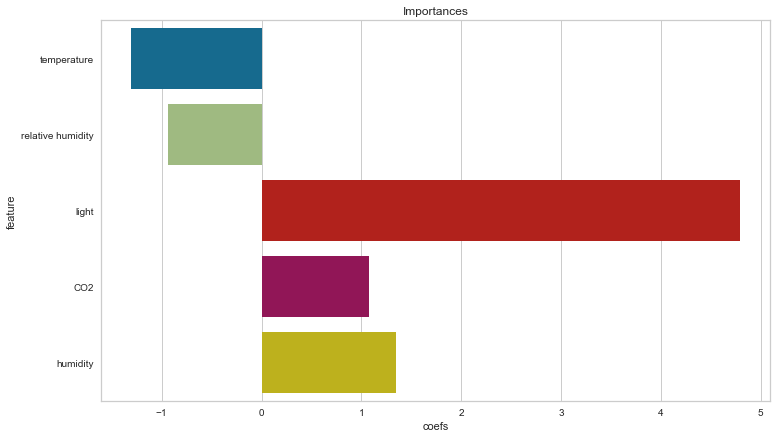

In [643]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
sns.barplot(importances.coefs,importances.feature, orient='h', ax=ax, )
plt.title('Importances')
plt.show()

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
detected multi-dimensional feature importances but stack=False, using mean to aggregate them.


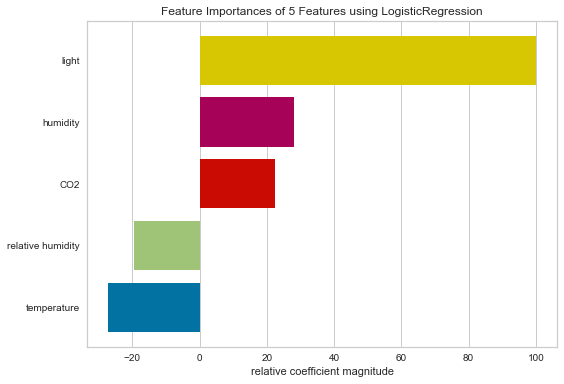

In [644]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model)
viz.fit(X_train, y_train)
viz.show()

In [634]:
df = pd.concat([X_train, y_train], axis=1)

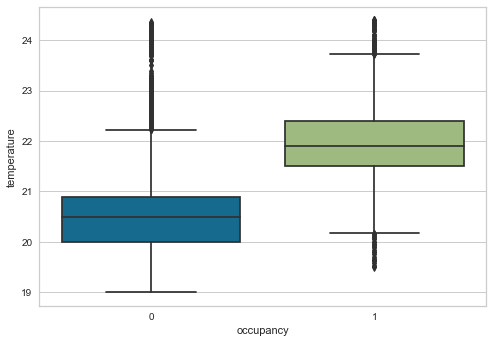

In [635]:
sns.boxplot(df.occupancy, y=df.temperature)

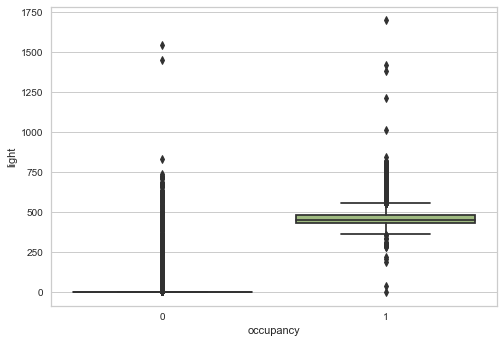

In [645]:
sns.boxplot(df.occupancy, y=df.light)

In [646]:
def plot_log_odds(x=None):
    xs = np.linspace(-4,4,100)
    plt.figure(figsize=(12,6))
    plt.xlabel("Log odds")
    plt.ylabel("Probability of 1")
    plt.title('Probability of 1')
    plt.plot(xs, 1/(1+np.exp(-xs)))
    
    y = 1/(1+np.exp(-x))
    plt.vlines(x, 0, 1, linestyles='--', color='red')
    plt.hlines( y, -4, 4, linestyles='-', color='black')
    plt.text(x+0.3, y+0.015, f'{y:.2f}', size=15)
    
    plt.show()



In [647]:
from ipywidgets import interact

In [656]:
interact(plot_log_odds, x=(-4., 4., 1.5))

interactive(children=(FloatSlider(value=-1.0, description='x', max=4.0, min=-4.0, step=1.5), Output()), _dom_c…

<function __main__.plot_log_odds(x=None)>

In [450]:
from sklearn.inspection import plot_partial_dependence

In [451]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The fig parameter is deprecated in version 0.22 and will be removed in version 0.24


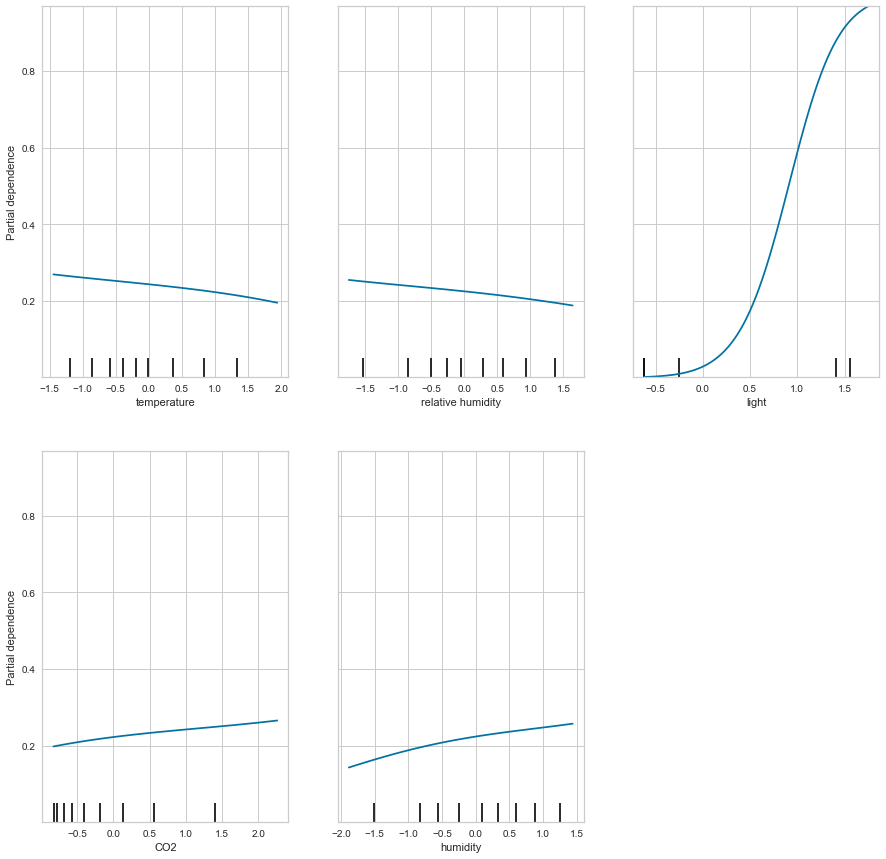

In [650]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

plot_partial_dependence(model, 
                        scaler.transform(X_test), 
                        features=X_train.columns, 
                        feature_names=X_train.columns,
                        grid_resolution=100, fig = fig)

The fig parameter is deprecated in version 0.22 and will be removed in version 0.24


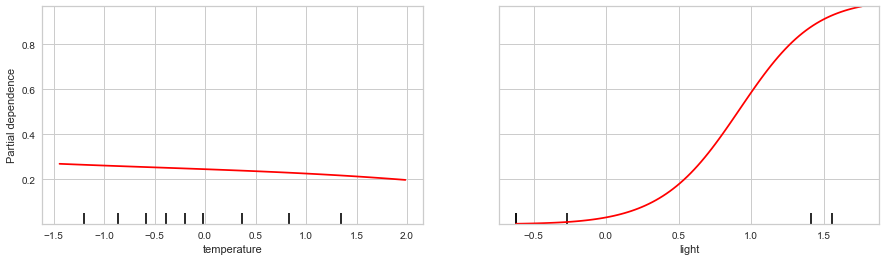

In [651]:
fig, ax = plt.subplots(1,1, figsize=(15,4))

logistic_plt = plot_partial_dependence(model, 
                        scaler.transform(X_train), 
                        features=[0,2], 
                        feature_names=X_train.columns,
                        grid_resolution=100, fig = fig,
                        line_kw={'c':'red'})

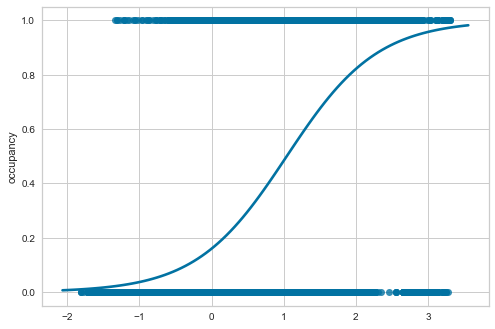

In [653]:
sns.regplot(StandardScaler().fit_transform(X_train[['temperature']]), y_train, logistic=True, ci=None )

In [658]:
test_model = LogisticRegression()

test_model.fit(StandardScaler().fit_transform(X_train[['temperature', 'light']]), y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [659]:
test_model.coef_

array([[-0.6307729 ,  5.24929562]])

In [657]:
df.corr()

,temperature,relative humidity,light,CO2,humidity,occupancy
temperature,1.000000,-0.152252,0.689293,0.447125,0.210375,0.558837
relative humidity,-0.152252,1.000000,-0.023997,0.304493,0.932574,0.051993
light,0.689293,-0.023997,1.000000,0.447906,0.229159,0.914142
CO2,0.447125,0.304493,0.447906,1.000000,0.481126,0.502735
humidity,0.210375,0.932574,0.229159,0.481126,1.000000,0.264164
occupancy,0.558837,0.051993,0.914142,0.502735,0.264164,1.000000


In [660]:
df.describe()

,temperature,relative humidity,light,CO2,humidity,occupancy
count,15420.000000,15420.000000,15420.00000,15420.000000,15420.000000,15420.000000
mean,20.909375,27.645765,130.90745,691.837629,0.004228,0.231388
std,1.054197,4.970803,210.93738,313.344982,0.000768,0.421733
min,19.000000,16.745000,0.00000,412.750000,0.002678,0.000000
25%,20.200000,24.500000,0.00000,460.000000,0.003721,0.000000
50%,20.700000,27.268750,0.00000,565.166667,0.004288,0.000000
75%,21.525000,31.245000,301.00000,805.750000,0.004833,0.000000
max,24.390000,39.500000,1697.25000,2076.500000,0.006476,1.000000


In [661]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [672]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(scaler.transform(X_train), y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

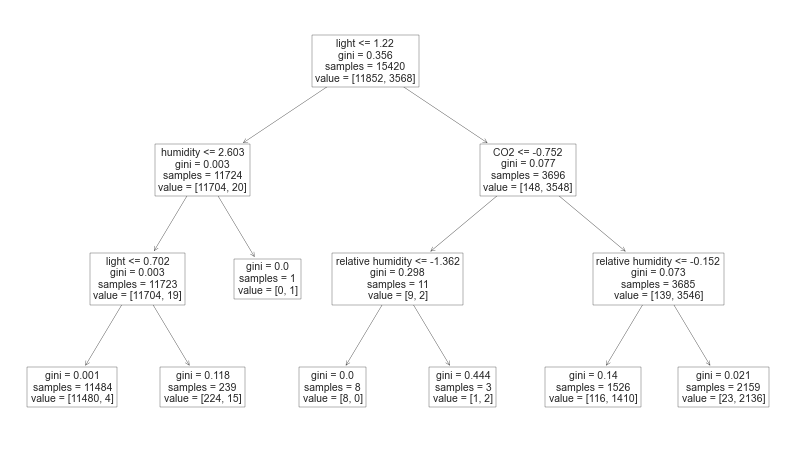

In [677]:
plt.figure(figsize=(14, 8))
plot_tree(tree, feature_names=X_train.columns);

The fig parameter is deprecated in version 0.22 and will be removed in version 0.24


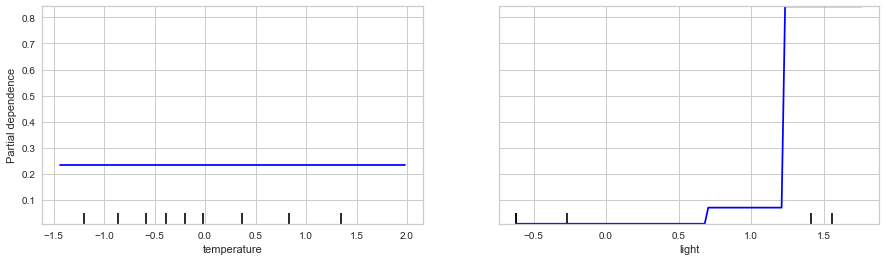

In [674]:
fig, ax = plt.subplots(1,1, figsize=(15,4))

tree_plt = plot_partial_dependence(tree, 
                        scaler.transform(X_train), 
                        features=[0,2], 
                        feature_names=X_train.columns, 
                        fig = fig,
                        line_kw={'c':'blue'})

The fig parameter is deprecated in version 0.22 and will be removed in version 0.24


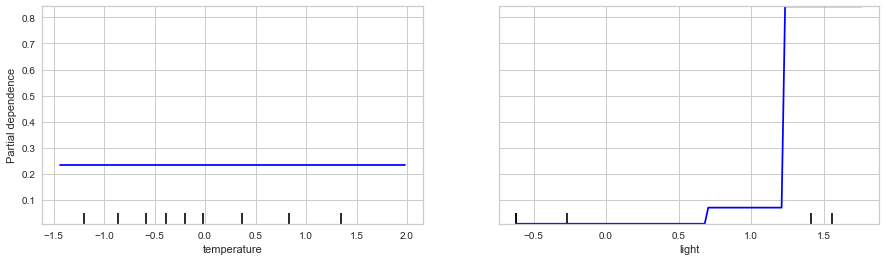

In [675]:
fig, ax = plt.subplots(1,1, figsize=(15,4))

tree_plt = plot_partial_dependence(tree, 
                        scaler.transform(X_train), 
                        features=[0,2], 
                        feature_names=X_train.columns, 
                        fig = fig,
                        line_kw={'c':'blue'})

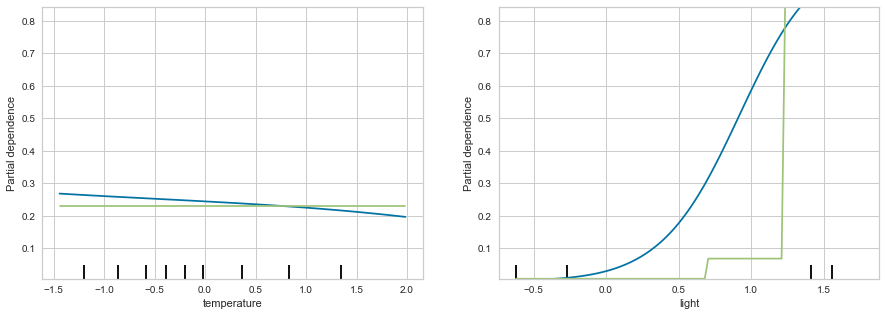

In [676]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

logistic_plt.plot(ax=[ax1, ax2])
tree_plt.plot(ax=[ax1, ax2])

## What if we use a model that give space to variables

In [683]:
from sklearn.ensemble import RandomForestClassifier

In [684]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

In [685]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [686]:
importances = pd.DataFrame(list(zip(rf.feature_importances_, X_train.columns)), 
                           columns=['importances','col_names']).sort_values(by='importances', ascending=False)
importances

,importances,col_names
2,0.506763,light
0,0.300462,temperature
3,0.156541,CO2
4,0.033559,humidity
1,0.002675,relative humidity


The fig parameter is deprecated in version 0.22 and will be removed in version 0.24


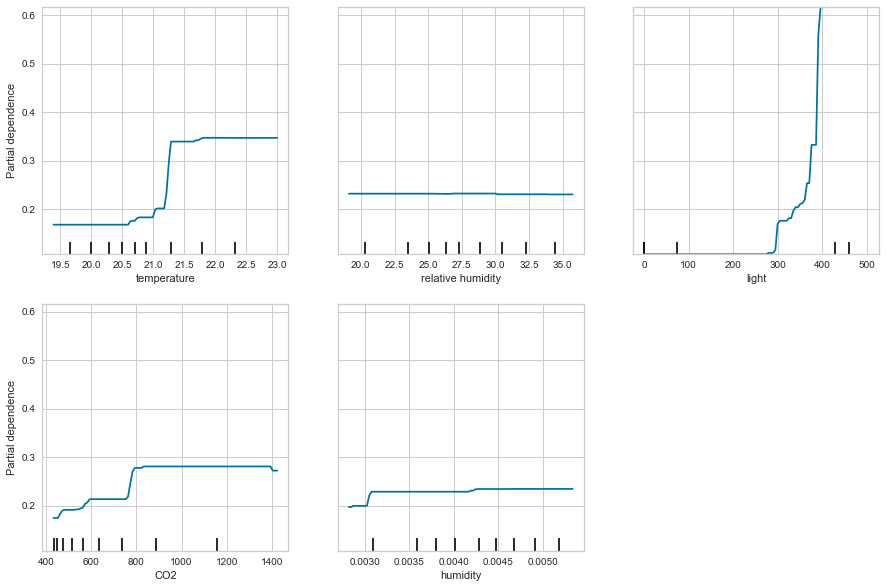

In [688]:
fig, ax = plt.subplots(1,1, figsize=(15,10))

plot_partial_dependence(rf, 
                        X_train, 
                        features = list(X_train.columns), 
                        feature_names=list(X_train.columns),
                        n_jobs=-1, 
                        grid_resolution=100, 
                        fig = fig)

plt.show()

# Shap - Model Agnostic ML Interpreter 

In [1]:
from xgboost import XGBClassifier

In [2]:
xgb = XGBClassifier(n_estimators=100, max_depth=2, importance_type='gain', colsample_bytree=0.3)
xgb.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [691]:
importances = pd.DataFrame(list(zip(xgb.fit(X_train, y_train).feature_importances_, X_train.columns)), 
                           columns=['importances','col_names']).sort_values(by='importances', ascending=False)

In [692]:
importances

,importances,col_names
2,0.585473,light
0,0.177267,temperature
3,0.168598,CO2
4,0.053831,humidity
1,0.014830,relative humidity


The fig parameter is deprecated in version 0.22 and will be removed in version 0.24


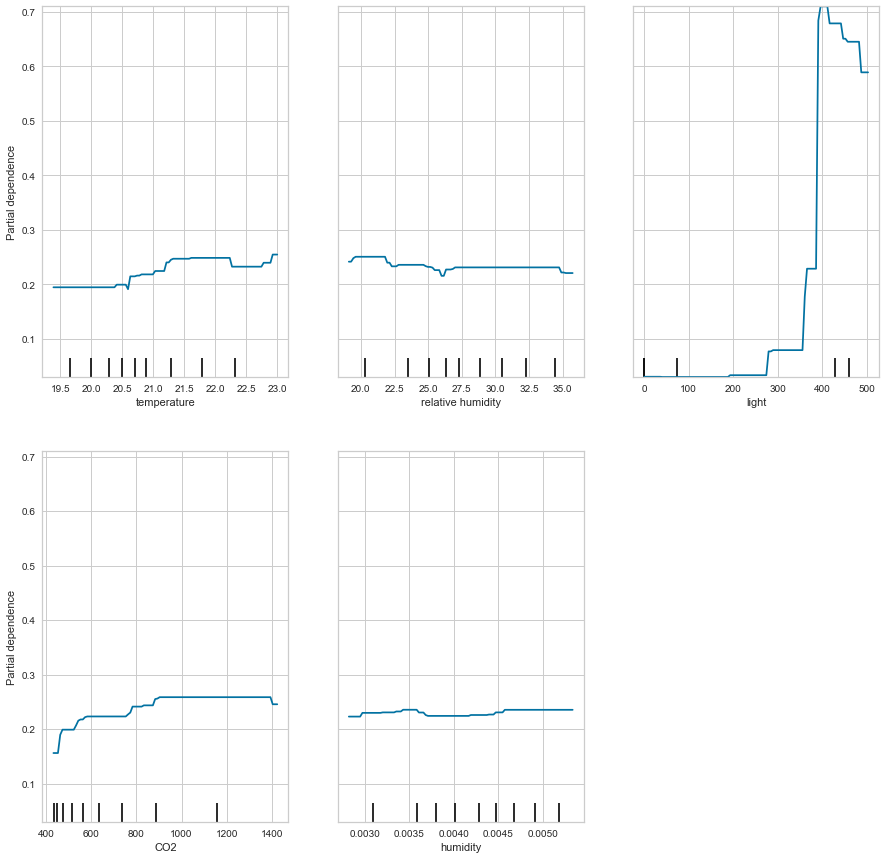

In [693]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

plot_partial_dependence(xgb, 
                        X_train, 
                        features = list(X_train.columns), 
                        feature_names=list(X_train.columns),
                        n_jobs=-1, 
                        grid_resolution=100, 
                        fig = fig)

plt.show()

In [3]:
import shap

shap.initjs()

In [4]:
explainer = shap.TreeExplainer(xgb)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


XGBoostError: need to call fit or load_model beforehand

In [701]:
shap_values = explainer.shap_values(X_test)

## Summary Plot

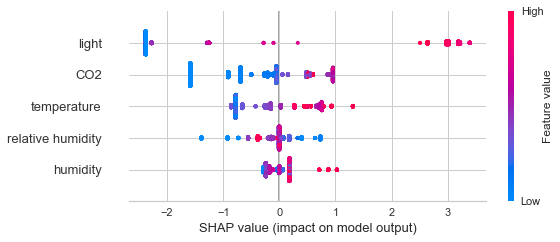

In [702]:
shap.summary_plot(shap_values, X_test)

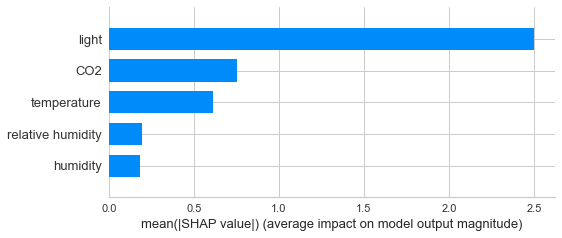

In [703]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

## Partial Dependence Plot in Shap

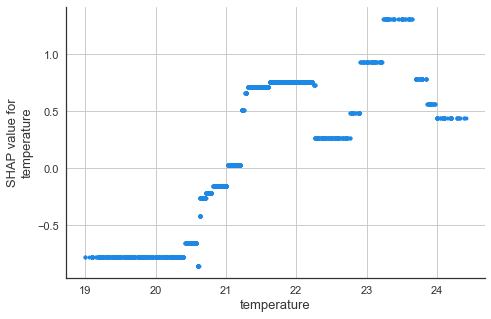

In [704]:
shap.dependence_plot('temperature', shap_values, X_test, interaction_index=None)

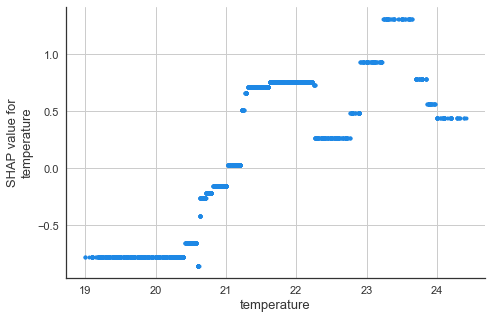

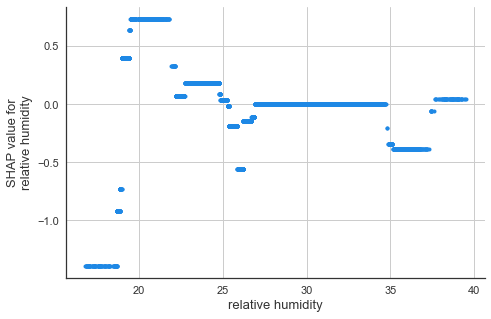

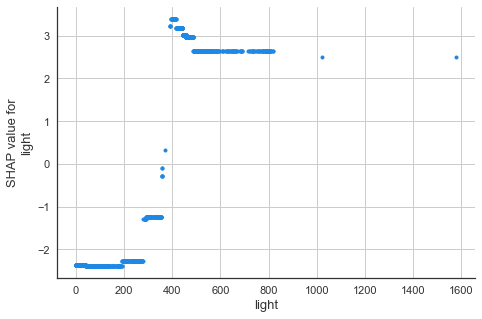

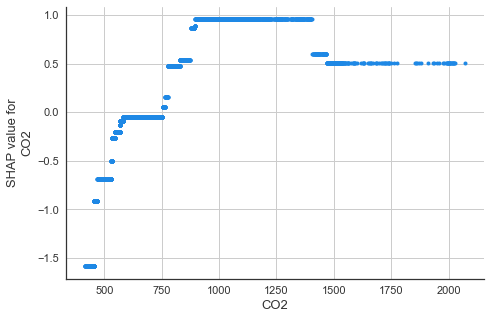

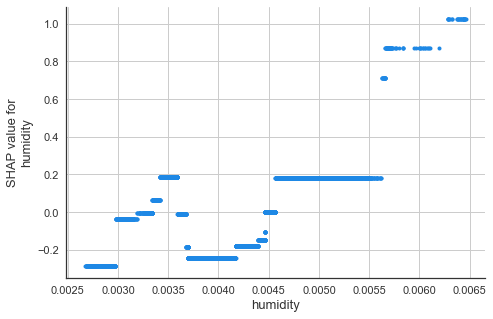

In [705]:
for each_col in X_test.columns:
    shap.dependence_plot(each_col, shap_values, X_test, interaction_index=None)

## Force Plot

In [706]:
pd.concat([X_test, y_test], axis=1)

,temperature,relative humidity,light,CO2,humidity,occupancy
17775,21.500,27.840,454.0,1019.500000,0.004415,1
5971,19.500,27.525,0.0,451.000000,0.003855,0
11804,20.500,22.445,0.0,734.500000,0.003341,0
18114,21.790,29.790,429.0,934.500000,0.004812,1
290,21.290,25.700,0.0,475.500000,0.004021,0
...,...,...,...,...,...,...
18920,20.245,30.650,0.0,743.000000,0.004500,0
12341,22.290,26.650,439.0,555.000000,0.004435,1
8898,20.500,22.390,0.0,438.666667,0.003333,0
17027,20.290,31.000,0.0,718.000000,0.004564,0


In [710]:
base_value = explainer.expected_value

N = 4
print(y_test.iloc[N])
shap.force_plot(base_value, shap_values[N], features=X_test.iloc[N], feature_names=X_train.columns, link='logit')



0


In [543]:
from IPython.display import display

In [713]:
explainer.expected_value

-1.5087934

1


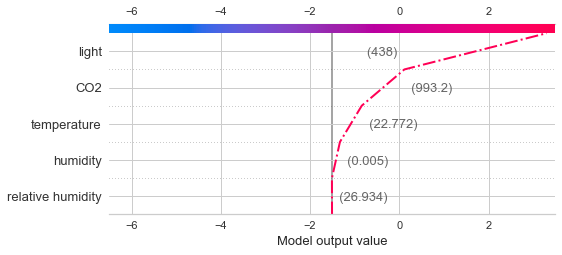

In [728]:
base_value = explainer.expected_value

N = 8
print(y_test.iloc[N])
display(shap.force_plot(base_value, shap_values[N], features=X_test.iloc[N], feature_names=X_train.columns, link='logit'))

shap.decision_plot(expected_value, shap_values[N], X_test.iloc[N], highlight=0 )

In [729]:
interact(plot_log_odds, x=(-4., 4., 1.0))

interactive(children=(FloatSlider(value=0.0, description='x', max=4.0, min=-4.0, step=1.0), Output()), _dom_cl…

<function __main__.plot_log_odds(x=None)>

## Another Example

In [5]:
X, y = shap.datasets.nhanesi()
X_display,y_display = shap.datasets.nhanesi(display=True) # human readable feature values


In [6]:
df = pd.concat([X_display, pd.Series(y_display, name='survival')], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
df

,Unnamed: 0,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,survival
0,0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,Female,142.0,323.0,41.8,5.8,31.109434,50.0,15.274658
1,1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,Female,156.0,331.0,26.9,5.3,32.362572,78.0,11.586073
2,2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,Female,170.0,299.0,38.5,8.1,25.388497,84.0,8.149087
3,3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,Female,172.0,349.0,26.9,6.7,26.446610,80.0,-21.094292
4,4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,Male,128.0,386.0,49.7,8.1,20.354684,58.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,9927,26.0,76.0,491.0,1.0,46.6,9.0,4.7,137.0,90.0,1.39,7.4,Male,104.0,316.0,28.5,10.7,21.468805,28.0,9.939726
9928,9928,69.0,82.0,316.0,1.0,48.0,18.0,4.7,301.0,98.0,2.02,6.7,Female,130.0,334.0,29.3,7.1,23.090226,48.0,-18.913927
9929,9929,34.0,80.0,187.0,1.0,47.3,10.0,4.5,161.0,95.0,1.54,6.9,Female,110.0,381.0,24.9,5.4,25.797680,30.0,-18.877169
9930,9930,57.0,84.0,999.0,1.0,54.7,5.0,4.5,210.0,93.0,1.82,7.0,Male,130.0,337.0,27.6,6.2,23.406200,46.0,-19.683105


<IPython.core.display.Javascript object>

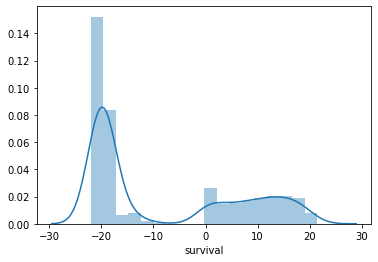

In [8]:
sns.distplot(df.survival)

In [9]:
X = X.drop(columns=['Unnamed: 0'])

In [10]:
y = (y>0).astype(int)

In [11]:
from xgboost import XGBClassifier

In [12]:
xgb = XGBClassifier()

In [13]:
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [14]:
X

,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,2.0,142.0,323.0,41.8,5.8,31.109434,50.0
1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,2.0,156.0,331.0,26.9,5.3,32.362572,78.0
2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,2.0,170.0,299.0,38.5,8.1,25.388497,84.0
3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,2.0,172.0,349.0,26.9,6.7,26.446610,80.0
4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,1.0,128.0,386.0,49.7,8.1,20.354684,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,26.0,76.0,491.0,1.0,46.6,9.0,4.7,137.0,90.0,1.39,7.4,1.0,104.0,316.0,28.5,10.7,21.468805,28.0
9928,69.0,82.0,316.0,1.0,48.0,18.0,4.7,301.0,98.0,2.02,6.7,2.0,130.0,334.0,29.3,7.1,23.090226,48.0
9929,34.0,80.0,187.0,1.0,47.3,10.0,4.5,161.0,95.0,1.54,6.9,2.0,110.0,381.0,24.9,5.4,25.797680,30.0
9930,57.0,84.0,999.0,1.0,54.7,5.0,4.5,210.0,93.0,1.82,7.0,1.0,130.0,337.0,27.6,6.2,23.406200,46.0


In [15]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


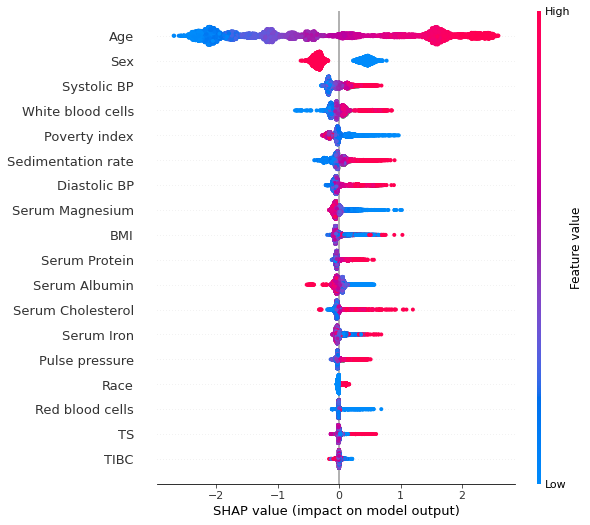

In [17]:
shap.summary_plot(shap_values, X)

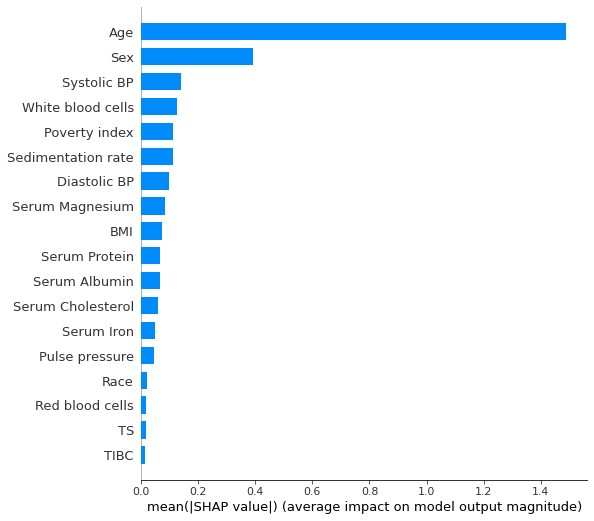

In [18]:
shap.summary_plot(shap_values, X, plot_type='bar', )

## Partial Dependence Plots in Shap

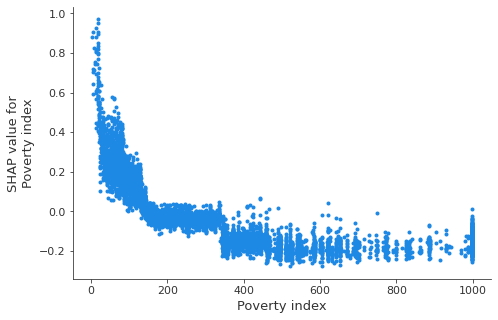

In [19]:
shap.dependence_plot("Poverty index", shap_values, X, interaction_index=None, )

### Interactions

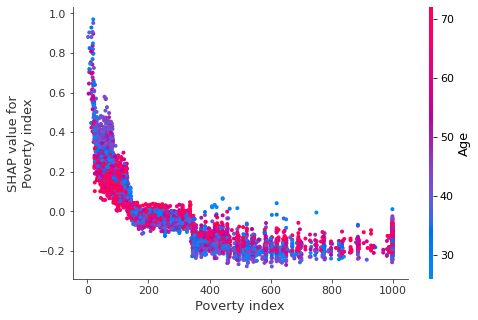

In [21]:
shap.dependence_plot("Poverty index", shap_values, X, interaction_index='Age', )

In [24]:
X.head()

,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,2.0,142.0,323.0,41.8,5.8,31.109434,50.0
1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,2.0,156.0,331.0,26.9,5.3,32.362572,78.0
2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,2.0,170.0,299.0,38.5,8.1,25.388497,84.0
3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,2.0,172.0,349.0,26.9,6.7,26.446610,80.0
4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,1.0,128.0,386.0,49.7,8.1,20.354684,58.0


In [23]:
X_display.head()

,Unnamed: 0,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,Female,142.0,323.0,41.8,5.8,31.109434,50.0
1,1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,Female,156.0,331.0,26.9,5.3,32.362572,78.0
2,2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,Female,170.0,299.0,38.5,8.1,25.388497,84.0
3,3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,Female,172.0,349.0,26.9,6.7,26.446610,80.0
4,4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,Male,128.0,386.0,49.7,8.1,20.354684,58.0


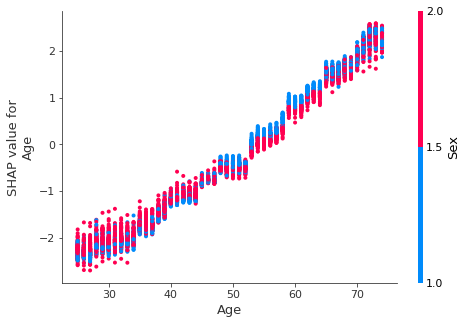

In [22]:
shap.dependence_plot("Age", shap_values, X)

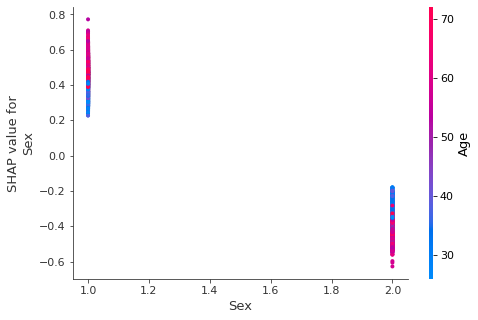

In [25]:
shap.dependence_plot("Sex", shap_values, X, display_features=X_display)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

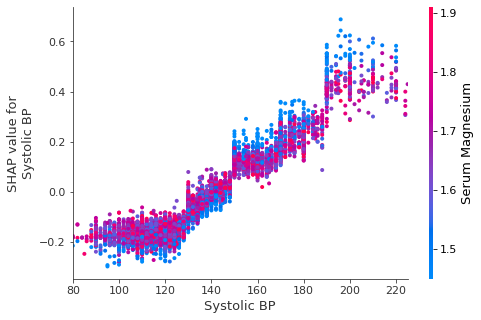

In [26]:
shap.dependence_plot("Systolic BP", shap_values, X, show=False)
plt.xlim(80,225)
plt.show()

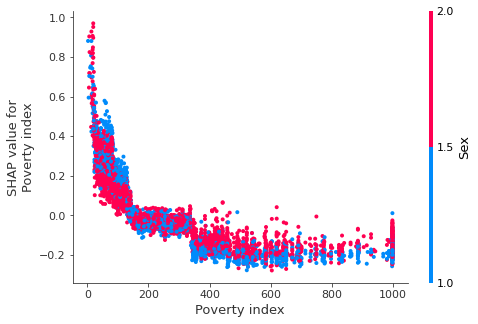

In [27]:
shap.dependence_plot("Poverty index", shap_values, X)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

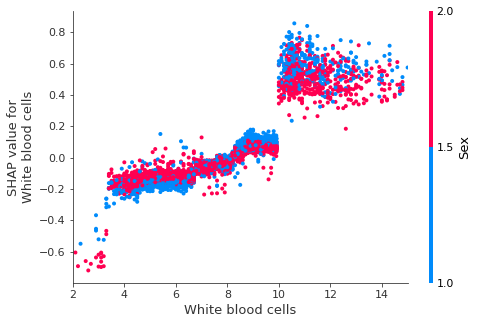

In [28]:
shap.dependence_plot("White blood cells", shap_values, X, display_features=X_display, show=False)
plt.xlim(2,15)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

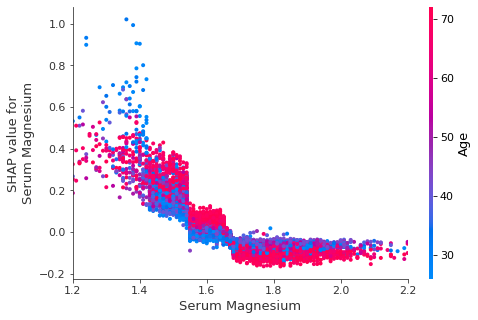

In [29]:
shap.dependence_plot("Serum Magnesium", shap_values, X, show=False)
plt.xlim(1.2,2.2)
plt.show()

In [30]:
df.head()

,Unnamed: 0,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,survival
0,0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,Female,142.0,323.0,41.8,5.8,31.109434,50.0,15.274658
1,1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,Female,156.0,331.0,26.9,5.3,32.362572,78.0,11.586073
2,2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,Female,170.0,299.0,38.5,8.1,25.388497,84.0,8.149087
3,3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,Female,172.0,349.0,26.9,6.7,26.446610,80.0,-21.094292
4,4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,Male,128.0,386.0,49.7,8.1,20.354684,58.0,-0.000000


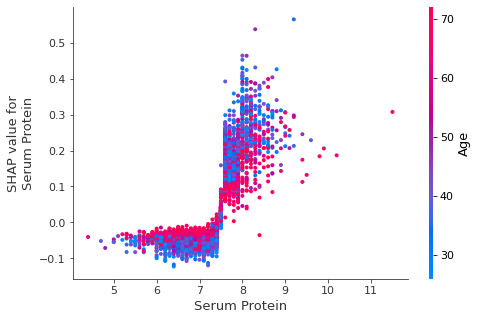

In [31]:
shap.dependence_plot("Serum Protein", shap_values, X)

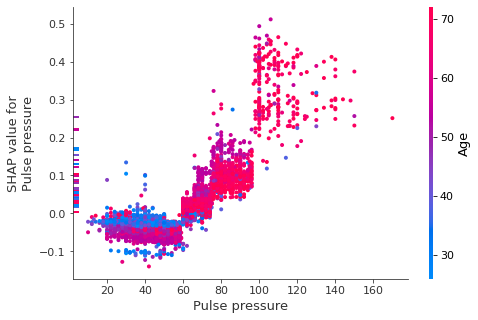

In [32]:
shap.dependence_plot("Pulse pressure", shap_values, X)


## Force Plots

In [33]:
expected_value = explainer.expected_value

In [37]:
y

array([1, 1, 1, ..., 0, 0, 1])

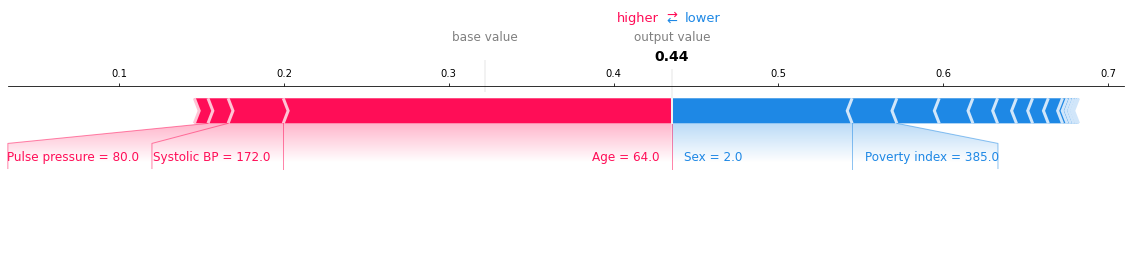

In [48]:
shap.force_plot(expected_value, shap_values[3], X.iloc[3], link='logit', show=False, matplotlib=True).savefig('output.png')

In [46]:
!pwd

/c/Users/andreaguiar/Desktop/usr/dev/ironhack/ft202002/classes/week10_remote/1_Model_Interpretability


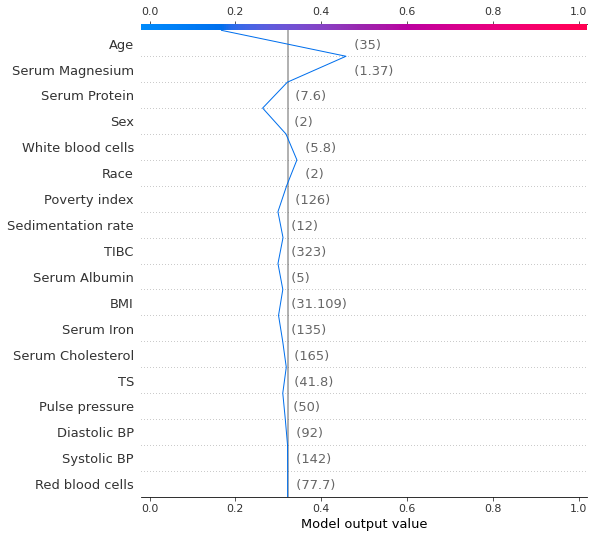

In [35]:
shap.decision_plot(expected_value, shap_values[0], X.iloc[0], link='logit')

In [42]:
shap.force_plot(expected_value, shap_values[:100], X.iloc[:100], link='logit')